[125, 332, 274, 304, 375, 196, 117, 164, 105, 132, 111, 125, 111, 206, 282, 111, 455, 175, 105, 265]
Mins: [169.28571429 233.57142857 412.14285714]
[[0, 6, 7, 8, 9, 10, 11, 12, 15, 18], [5, 13, 17], [1, 2, 3, 4, 14, 19], [16]]


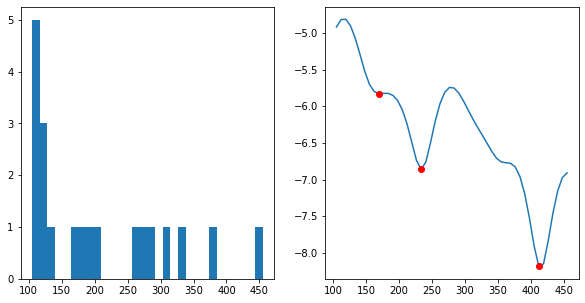

In [20]:
import matplotlib.pyplot as plt
from numpy import array, linspace
import numpy as np
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.stats import scoreatpercentile
from sklearn.model_selection import GridSearchCV, LeaveOneOut

def bandwidth_silverman(x):
    #Bandwidth estimated by Silverman's Rule of Thumb
    # A = min(std(x, ddof=1), IQR/1.349)
    IQR = np.subtract.reduce(np.percentile(x, [75,25]))
    b=4
    normalize = 1.349
    IQR = (scoreatpercentile(x, 75) - scoreatpercentile(x, 25)) / normalize
    std_dev = np.std(x, axis=0, ddof=1)
    if IQR > 0:
        A = np.minimum(std_dev, IQR)
    else:
        A = std_dev
    b = .9 * A * (n ** (-0.2))
    print("b=", b)
    return b

def bandwidths_grid_search(x):
    bandwidths = linspace(min(x),max(x))
    grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        param_grid={'bandwidth': bandwidths},
                        cv=15)
    grid.fit(a)

    b = grid.best_params_['bandwidth']
    print("b=", b)
    return b


def KDE(x,b):
    a = array(x).reshape(-1, 1)
    n = len(x)
    #kernel Density 
    kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(a)
    s = linspace(min(x),max(x))
    e = kde.score_samples(s.reshape(-1,1))

    mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
    mins = s[mi]
    print("Mins:", mins)

    # fig, ax = plt.subplots(1, 1)
    # ax2 = ax.twinx()
    # ax3 = ax2.twiny()

    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(10, 5)

    plt.subplot(1, 2, 1)
    plt.hist(x, bins=30)
    
    plt.subplot(1, 2, 2)
    plt.plot(s,e,
            s[mi], e[mi], 'ro')

    fig.savefig('test2png.png', dpi=100)
    groupings = []
    head_index = []
    for i in range(len(mins)):
      if i==0:
        groupings.append(a[a<mins[i]])
        head_index.append(list(np.where(a<mins[i])[0]))
      elif i==len(mins)-1:  
        groupings.append(a[(a >= mins[i-1]) * (a < mins[i])])
        head_index.append(list(np.where((a >= mins[i-1]) * (a < mins[i]))[0]))
        groupings.append(a[a >= mins[i]])
        head_index.append(list(np.where(a >= mins[i])[0]))
      else:
        groupings.append(a[(a >= mins[i-1]) * (a < mins[i])])
        head_index.append(list(np.where((a >= mins[i-1]) * (a < mins[i]))[0]))
    return head_index




x = [125, 332, 274, 304, 375, 196, 117, 164, 105, 132, 111, 125, 111, 206, 282, 111, 455, 175,105, 265]
print(x)
head_index = KDE(x,b=20)
print(head_index)

# KDE(x, b= bandwidths_grid_search(x))
# KDE(x, b= bandwidth_silverman(x))